<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  

<img src="img/logo-vector-u-tad.jpg" align="left" >

# 9. Álgebra simbólica

Sympy ofrece multitud de posibilidades para manejar símbolos, y esa es la base del álgebra.

## Expresiones algebraicas

Con Sympy podemos factorizar, desarrollar y simplificar expresiones de la misma forma que cuando trabajamos con papel y lápiz.

In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()  

expresion = sp.sympify('(x-1)*(x+2)*(x-5)')
print(expresion)
# Vamos a expandir el polinomio
print()
expresion = expresion.expand()
sp.pprint(expresion)

(x - 5)*(x - 1)*(x + 2)

 3      2           
x  - 4⋅x  - 7⋅x + 10


`collect` obtiene factor común de las potencias de una expresión.

In [2]:
x,y,z = sp.symbols('x y z')
polinomio = sp.sympify('8*(x-y)**3+(x+z)**3+2')
sp.pprint(polinomio)
print("=")
sp.pprint(polinomio.expand())
print("=")
sp.pprint(sp.collect(polinomio,x))

         3          3    
8⋅(x - y)  + (x + z)  + 2
=
   3       2        2           2        2      3    3    
9⋅x  - 24⋅x ⋅y + 3⋅x ⋅z + 24⋅x⋅y  + 3⋅x⋅z  - 8⋅y  + z  + 2
=
         3          3    
8⋅(x - y)  + (x + z)  + 2


`cancel` simplifica las expresiones fraccionarias.

In [3]:
expresion = (2*x + x/4 - 2)/(x**2 - 4)
sp.pprint(expresion)
print("=")
sp.pprint(sp.cancel(expresion))

9⋅x    
─── - 2
 4     
───────
  2    
 x  - 4
=
 9⋅x - 8 
─────────
   2     
4⋅x  - 16


La función `apart` descompone en fracciones parciales

In [4]:
expresion=(5*x+3)/(x**2+2*x-3)
sp.pprint(expresion)
print("=")
sp.pprint(expresion.apart())

  5⋅x + 3   
────────────
 2          
x  + 2⋅x - 3
=
  3       2  
───── + ─────
x + 3   x - 1


La integral indefinida de


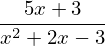

In [5]:
# SymPy realiza la descomposición en fracciones parciales para integrar sin que tengamos que pedirlo de forma explícita

integral = sp.symbols('integral')
integral = sp.integrate(expresion, x)
print ("La integral indefinida de")
expresion

In [6]:
print ("es")
integral

es


`trigsimp` y `expand_trig` son las funciones equivalentes a `factor`y `expand` cuando hay expresiones trigonométricas en el problema.

In [7]:
expresiontrig = sp.cos(2*x)
sp.pprint(expresiontrig)
print("es igual a ")
sp.pprint(sp.expand_trig(expresiontrig))
print("")
expresiontrig = sp.sin(2*x)
sp.pprint(expresiontrig)
print("es igual a ")
sp.pprint(sp.expand_trig(expresiontrig))
print()
expresiontrig = sp.tan(2*x)
sp.pprint(expresiontrig)
print("es igual a ")
sp.pprint(sp.expand_trig(expresiontrig))

print()
expresiontrig = 2*sp.tan(x)/(1-sp.tan(x)*sp.sin(x)/sp.cos(x))
sp.pprint(expresiontrig)
print("es igual a ")
sp.pprint(sp.trigsimp(expresiontrig))


cos(2⋅x)
es igual a 
     2       
2⋅cos (x) - 1

sin(2⋅x)
es igual a 
2⋅sin(x)⋅cos(x)

tan(2⋅x)
es igual a 
  2⋅tan(x) 
───────────
       2   
1 - tan (x)

      2⋅tan(x)     
───────────────────
  sin(x)⋅tan(x)    
- ───────────── + 1
      cos(x)       
es igual a 
tan(2⋅x)


## Resolución de ecuaciones

Sympy encuentra las raíces de una ecuación usando la función `solve`

In [8]:
raices = sp.solve(expresion)
print("raices de",expresion)
sp.pprint(raices)
print()

# Hagamos los mismo con otro polinomio del que desconocemos sus factores
expresion2 = sp.sympify('x**2-4*x-1')
raices2 = sp.solve(expresion2)
print("raices de",expresion2)
sp.pprint(raices2)

expresion3 = expresion/expresion2
print("expresion/expresion2",expresion/expresion2)
# Forma simplificada
print("Forma simplificada",sp.simplify(sp.factor(expresion)/sp.factor(expresion2)))

raices de (5*x + 3)/(x**2 + 2*x - 3)
[-3/5]

raices de x**2 - 4*x - 1
[2 - √5, 2 + √5]
expresion/expresion2 (5*x + 3)/((x**2 - 4*x - 1)*(x**2 + 2*x - 3))
Forma simplificada -(5*x + 3)/((x - 1)*(x + 3)*(-x**2 + 4*x + 1))


La función `solve` de SymPy tiene la ventaja de que no necesita una pista para localizar las raíces, y encuentra todas de una vez, pero es más lenta que los métodos numéricos y no siempre funciona.

In [9]:
# Utilizamos el mismo ejemplo que en la lección de resolución numérica
expresion = sp.exp(x/3)/3+4*sp.sin(4*x)
sp.pprint(expresion)
print()

# Resolución numérica
def fuerzabruta(serie,x):
    raices = list()              # lista vacía
    lserie = len(serie)
    for i in range(lserie-1):
        if ((serie[i+1]*serie[i])<0):     # Producto negativo si hay cambio de signo
            raices.append((x[i+1]+x[i])/2)
    return raices

def frara(xn):
    return(np.exp(xn/3)-np.cos(4*xn)-0.7)

xn = np.linspace(0,np.pi,50)
yn = frara(xn)
raiceseq = fuerzabruta(yn,xn)
print("Raíces por el método numérico de fuerza bruta", raiceseq)


 x             
 ─             
 3             
ℯ              
── + 4⋅sin(4⋅x)
3              

Raíces por el método numérico de fuerza bruta [0.28851361104396056, 1.5066821910073496, 1.5707963267948966]


In [10]:
# La resolución con SymPy no siempre es posible, hay ocasiones en que solve es incapaz de encontrar las raíces
# y produce una excepción. Como ejemplo, la misma ecuación que se ha resuelto numéricamente.

try:
    raices = sp.solve(expresion)
    print("Raíces con SymPy solve",raices)      # Mensaje de error porque es incapaz de encontrar la solución
except:
    print("Sympy: imposible resolver la ecuación "+str(expresion)+" =0")

Sympy: imposible resolver la ecuación exp(x/3)/3 + 4*sin(4*x) =0


In [13]:
# Tampoco puede resolver lo imposible algebraicamente, como una ecuación trascendente.
#
# Véase el mensaje de error

raices = sp.solve(sp.cos(x)-x)

NotImplementedError: multiple generators [x, cos(x)]
No algorithms are implemented to solve equation -x + cos(x)

## Matrices

SymPy tiene su propia clase de matrices, que no debe ser confundida con los arrays de NumPy.

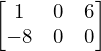

In [14]:
# Definición explícita con valores
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
M = Matrix([[1,0,6], [-8,0,0]]);
M

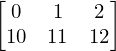

In [15]:
# Definición con una función
P = Matrix(2,3,lambda x,y:x*10+y)
P

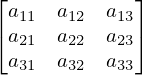

In [16]:
# Definición con contenido simbólico con una función
A = Matrix(3,3,lambda x,y:sp.symbols('a'+str((x+1)*10+y+1)))
A


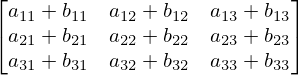

In [17]:
B = Matrix(3,3,lambda x,y:sp.symbols('b'+str((x+1)*10+y+1)))
A+B

`eye`crea una matriz con valor 1 en la diagonal (aunque no sea cuadrada) y el resto a 0 

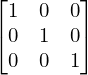

In [18]:
E3 = eye(3,3)
E3

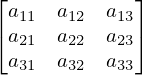

In [19]:
A*E3                         # Al multiplicar por la matriz identidad se obtiene la matriz original

Los objetos de la clase matriz pueden manipularse mediante sus propios métodos, por ejemplo, `.inv` para inversión

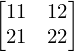

In [20]:
V = Matrix(2,2,lambda x,y:(x+1)*10+y+1)
V

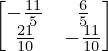

In [21]:
V.inv()

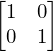

In [22]:
V*(V.inv())

Con `det`se calcula el determinante

In [23]:
V.det()                         # Cálculo con valores numéricos

In [24]:
A.det()                         # Cálculo con símbolos

Con estas herramientas ya podemos resolver sistemas de ecuaciones lienales. Lo aplicamos al mismo ejemplo que usamos con NumPy.

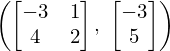

In [25]:
#  Encontrar el punto de corte de las rectas
# -3x + y = -3
#  4x + 2y = 5

AL = Matrix([[-3,1],[4,2]])
bL = Matrix([[-3,5]]).T

AL, bL

In [26]:
r1 =  Matrix([[-3,1],[5,2]]).det()/AL.det()
r2 =  Matrix([[-3,-3],[4,5]]).det()/AL.det()

print("Las rectas se cortan en el punto x=",r1,"y=", r2)

Las rectas se cortan en el punto x= 11/10 y= 3/10


Con el método `LUsolve`la ecuación se resuelve en un único paso.

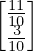

In [27]:
rs = AL.LUsolve(bL)
rs

Autovalores y autovectores

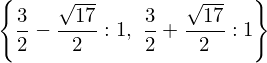

In [28]:
Matrix([[1,2],[2,2]]).eigenvals()

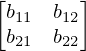

In [29]:
MC = Matrix(2,2,lambda x,y:sp.symbols('b'+str((x+1)*10+y+1)))
MC

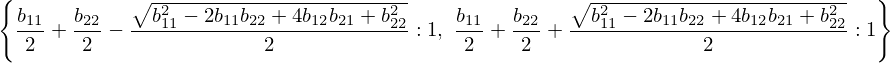

In [30]:
MC.eigenvals()

## Trabajando con vectores

En esta última sección se introduce el manejo de vectores con SymPy, tanto para manipulaciones algebraicas como para cálculo. 

Empezamos importando el paquete de funciones vectoriales.

In [31]:
from sympy.physics.vector import *

# Definición de una base ortonormal de dos dimensiones.

N = ReferenceFrame('N')               # Creación del marco de referencia, por defecto tridimensional
i = N.x                               # Definición de los vectores unitarios, por defecto ortonormales
j = N.y
k = N.z
i

In [32]:
v1,v2,v3 = sp.symbols("v1 v2 v3")
v1 = -3*i+2*j
v2 = i+4*j+k
# Producto escalar
v1.dot(v2)

In [33]:
# Aritmética vectorial
v3 = v1 + v2
v3

In [34]:
# Producto vectorial
v1.cross(v2)

El momento de una fuerza respecto al punto $O$ se define como el producto vectorial de la fuerza por el vector desde el origen al punto de aplicación. 

$\mathbf M_\text{O}=
\overrightarrow{\text{OP}} \times \mathbf{F}=
\mathbf{r} \times \mathbf{F} $

In [35]:
# Imaginemos una esfera unida por una varilla de masa despreciable a un eje de rotación que tomamos como origen de coordenadas
# Momento de una fuerza de 8N en sentido perpendicular al eje X aplicada en O = 6,0
# se expresa en N x m

OP, F, M = sp.symbols("OP F M")
OP = 6*i
F = 8*j
M = OP.cross(F)
M

In [36]:
# Momento de la misma fuera pero aplicada con un ángulo de 45 grados respecto del eje X
F = sp.sqrt(8)*i+sp.sqrt(8)*j
M = OP.cross(F)
M

In [37]:
# La magnitud de este par es menor
M.magnitude()

In [38]:
#Si la fuerza se aplicase en el sentido del eje X el par es nulo
F = 8*i
M = OP.cross(F)
M

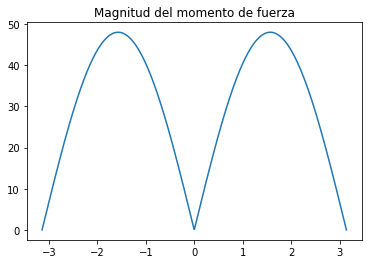

In [39]:
# Función genérica expresada según el ángulo alfa que forma la fuerza con el eje X
# Para ello hay que descomponer la fuerza según los ejes X e Y
# La magnitud es máxima cuando la fuerza se aplica perpendicularmente

Fx, Fx, alfa = sp.symbols("FX FY alfa")
Fuerza = 8
M_modulo = []
angulo = np.linspace(-np.pi,np.pi,1000)
for alfa in angulo:
    Fx = Fuerza*sp.cos(alfa)
    Fy = Fuerza*sp.sin(alfa)
    F = Fx*i+Fy*j
    M = OP.cross(F)
    M_modulo.append(M.magnitude())
plt.title("Magnitud del momento de fuerza")
plt.plot(angulo,M_modulo)


---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 